<a href="https://colab.research.google.com/github/emanuel379/Regressao-I/blob/main/Lista_4_Regress%C3%A3o_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Emanuel Victor da Silva Favorato

**Número USP:** 12558151

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import scipy.stats as st
import numpy as np
from statsmodels.stats.anova import anova_lm

In [ ]:
# Desempacotando arquivo zip
from zipfile import ZipFile
file_name = 'dados_lista4.zip'
with ZipFile(file_name, 'r') as zip:

    zip.printdir()


    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
dados_comunidades_mobilidade.csv               2022-11-18 09:26:28        43051
dados_genericos.csv                            2022-11-18 10:22:00          452
dados_temperatura_pressao.csv                  2022-11-16 08:00:02           68
Extracting all the files now...
Done!


**2.** O arquivo dados_temperatura_pressao.csv contém os dados da variação da pressão Y em função da temperatura X em um certo sistema mecânico.


In [ ]:
df = pd.read_csv('dados_temperatura_pressao.csv')
df

,Pressao,Temperatura
0,9.2,10
1,17.5,20
2,31.8,30
3,55.3,40
4,92.5,50
5,149.4,60


**(a)** Ajuste um modelo linear de primeira ordem. Visualize o gráfico do modelo ajustado juntamente com o gráfico de dispersão dos dados. Discuta a adequabilidade do modelo.

In [ ]:
# Obtendo o modelo simples
modelo21 = smf.ols(formula='Pressao ~ Temperatura', data=df)
resultado21 = modelo21.fit()
print(resultado21.summary())

                            OLS Regression Results                            
Dep. Variable:                Pressao   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     37.59
Date:                Thu, 14 Dec 2023   Prob (F-statistic):            0.00359
Time:                        01:02:31   Log-Likelihood:                -24.807
No. Observations:                   6   AIC:                             53.61
Df Residuals:                       4   BIC:                             53.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -35.6667     17.232     -2.070      

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


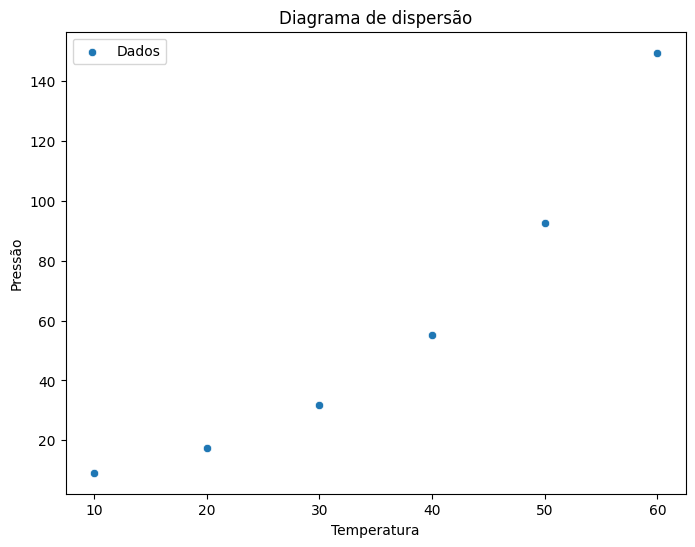

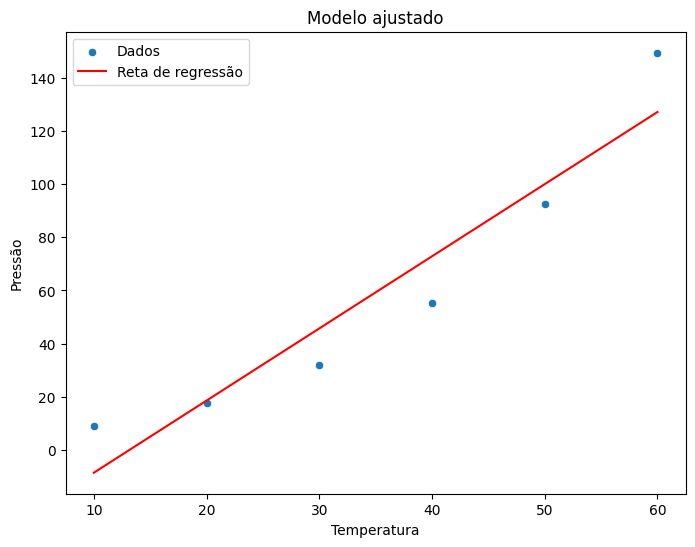

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Temperatura', y = 'Pressao', data = df, label = 'Dados')

plt.xlabel('Temperatura')
plt.ylabel('Pressão')
plt.title('Diagrama de dispersão')
plt.legend()
plt.show()

# Modelo de regressão linear
X = df[['Temperatura']]
y = df['Pressao']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Temperatura', y = 'Pressao', data = df, label = 'Dados')
plt.plot(X, model.predict(X), color='red', label='Reta de regressão')

plt.xlabel('Temperatura')
plt.ylabel('Pressão')
plt.title('Modelo ajustado')
plt.legend()
plt.show()

A falta de dados não nos permite afirmar que o modelo seja preciso ou não, entretanto, considerando o comportamento dos dados disponíveis e o ajuste obtido, temos que este não seria muito adequado, uma vez que o comportamento dos dados sugere que estes seguem uma função polinomial, mesmo apesar de possuir um elevado valor para o coeficiente R2.

**(b)** Faça um gráfico dos resíduos em função da resposta predita, $\hat{Y}$, e discuta novamente a adequabilidade do modelo.

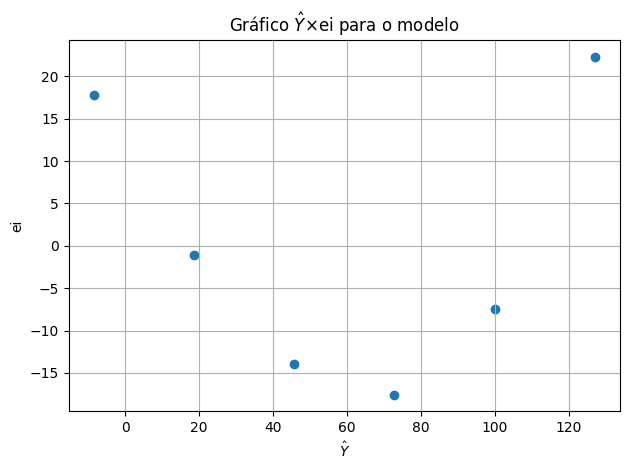

In [ ]:
# Obtendo os resíduos
residuos21 = resultado21.resid

# Encontrando Y^
Y21 = resultado21.predict()

# Observando o scatterplot
plt.scatter(Y21, residuos21)
plt.xlabel('$\hat{Y}$')
plt.ylabel('ei')
plt.title('Gráfico $\hat{Y}$×ei para o modelo')
plt.grid(True)

plt.tight_layout()
plt.show()

A partir do gráfico de resíduos, obtemos mais uma evidência contra a linearidade do modelo, a formação de um padrão curvado entre os resíduos, o que nos permite assumir que, a partir dos dados coletados, um modelo polinomial apresentaria melhor ajuste aos dados.

**(c)** Ajuste agora um modelo de segunda-ordem aos dados. Há alguma evidência de que o termo quadrático é estatisticamente significante?

In [ ]:
# Obtendo o modelo quadrático
modelo22 = smf.ols(formula='Pressao ~ Temperatura + I(Temperatura**2)', data=df)
resultado22 = modelo22.fit()
print(resultado22.summary())

                            OLS Regression Results                            
Dep. Variable:                Pressao   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     566.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           0.000136
Time:                        01:02:32   Log-Likelihood:                -14.022
No. Observations:                   6   AIC:                             34.04
Df Residuals:                       3   BIC:                             33.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.1000    

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Através do ajuste obtido, temos que é possível afirmar que, a um nível de confiança de 95%, o termo quadrático é importante para o ajuste do modelo, uma vez que apenas valores diferentes de 0 estão contidos em nosso intervalo de confiança, permitindo-nos assumir que alterações no valor do termo quadrático implicam em alterações no valor final da pressão.

**(d)** Repita os itens (a) e (b) para o modelo de segunda ordem. Há evidência de que o modelo de segunda ordem fornece um melhor ajuste aos dados?

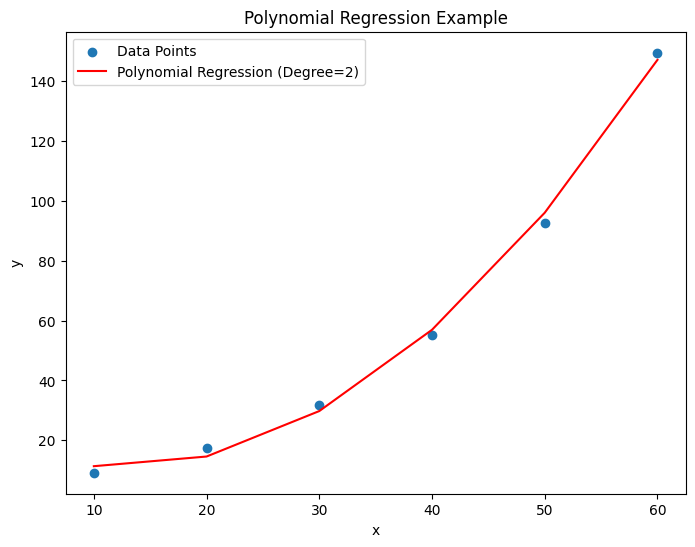

In [ ]:
# Modelo de regressão linear
X = df[['Temperatura']]
y = df['Pressao']
# Polynomial transformation
poly = PolynomialFeatures(degree=2)  # Choose the degree of the polynomial
x_poly = poly.fit_transform(X)

# Fit a linear regression model on the transformed data
model = LinearRegression()
model.fit(x_poly, y)

# Predictions using the model
y_pred = model.predict(x_poly)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression (Degree=2)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

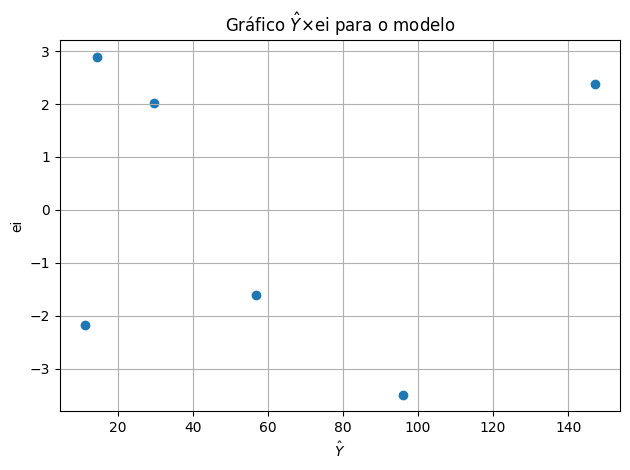

In [ ]:
# Obtendo os resíduos
residuos22 = resultado22.resid

# Encontrando Y^
Y22 = resultado22.predict()

# Observando o scatterplot
plt.scatter(Y22, residuos22)
plt.xlabel('$\hat{Y}$')
plt.ylabel('ei')
plt.title('Gráfico $\hat{Y}$×ei para o modelo')
plt.grid(True)

plt.tight_layout()
plt.show()

É possível observar que o modelo se ajustou melhor aos dados, também é possível  observar resíduos mais dispersos e distribuidos ao redor de 0 que não formam padrôes, como o padrão curvado para o modelo linear, o que nos traz evidências de que uma modelagem quadrática se ajustaria melhor aos dados observados.

**3.** Considere o arquivo dados_genericos.csv contendo a variáel resposta Y em função das covariáveis X1, X2 e X3.

In [ ]:
df = pd.read_csv('dados_genericos.csv')
df

,Y,x1,x2,x3
0,0.22200,7.3,0.0,0.0
1,0.39500,8.7,0.0,0.3
2,0.42200,8.8,0.7,1.0
3,0.43700,8.1,4.0,0.2
4,0.42800,9.0,0.5,1.0
5,0.46700,8.7,1.5,2.8
6,0.44400,9.3,2.1,1.0
7,0.37800,7.6,5.1,3.4
8,0.49400,10.0,0.0,0.3
9,0.45600,8.4,3.7,4.1


**(a)** Ajuste um modelo quadrático aos dados, incluindo termos cruzados; isto é, considere o modelo Y = β0 + β1X1 + β2X2 + β3X3 + β1,1(X^2)1 +β2,2(X^2)2 +β3,3(X^2)3 + β1,2X1X2+β1,3X1X3+β2,3X2X3+ε,
onde ε possui as propriedades usuais: E(ε) = 0 e Var(ε) = σ2. Dica: use o
PolynomialFeatures para criar a tabela com as covariáveis {1, X1, X2, X3, (X1)^2
, ..., X2X3}.

In [ ]:
# Obtendo o vetor de variáveis preditoras(X) e o vetor resposta(Y)
# Obtendo o modelo simples
modelo3 = smf.ols(formula='Y ~ x1 + x2 + x3 + I(x1**2) + I(x2**2) + I(x3**2) + x1*x2 + x1*x3 + x2*x3', data=df)
resultado3 = modelo3.fit()
print(resultado3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     19.63
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           5.05e-07
Time:                        01:02:32   Log-Likelihood:                 42.171
No. Observations:                  26   AIC:                            -64.34
Df Residuals:                      16   BIC:                            -51.76
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7694      1.287     -1.375      0.1

**(b)** Teste a significância da regressão, e construa a estatística t para cada coeficiente do modelo. Discuta os resultados.

In [ ]:
import scipy.stats as st
st.f.ppf(0.95,9,16)

2.5376665388806527

In [ ]:
t1 = st.t.ppf(0.025,16)
t2 = st.t.ppf(0.975,16)
print(t1, t2)

-2.1199052992210112 2.1199052992210112


Através dos testes F e t é possível afirmar que o modelo proposto não é bom para explicar os dados, uma vez que todos os coeficientes podem ser considerados iguais a zero, indicando que as covariáveis utilizadas não seriam boas para predizer a resposta e, portanto, que o modelo apresentado não seria apropriado na resolução do problema apresentado.

**(c)** Visualize os resíduos e comente sobre a adequabilidade do modelo.

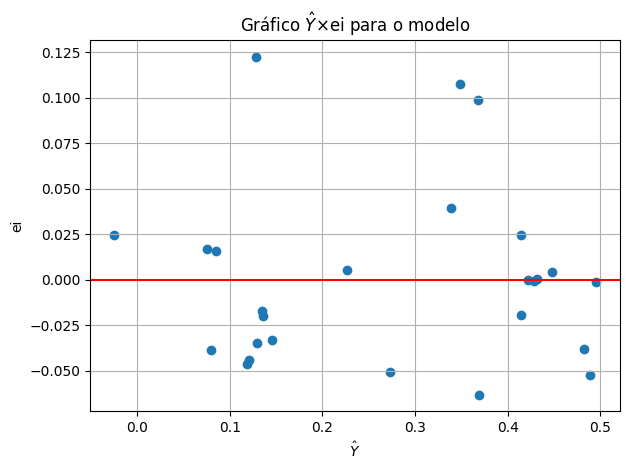

In [ ]:
# Obtendo os resíduos
residuos3 = resultado3.resid

# Encontrando Y^
Y3 = resultado3.predict()

# Observando o scatterplot
plt.scatter(Y3, residuos3)
plt.xlabel('$\hat{Y}$')
plt.ylabel('ei')
plt.axhline(y=0, color='red')
plt.title('Gráfico $\hat{Y}$×ei para o modelo')
plt.grid(True)

plt.tight_layout()
plt.show()

A partir da vizualização dos resíduos, podemos afirmar que o modelo é aparentemente adequado para a predição de Y, uma vez que estes se distribuem de forma aleatória centrada em 0, o que é indício de um modelo com boa aderência ao problema proposto.

**(d)** Utilize a soma extra dos quadrados para avaliar a contribuição de todos os termos de segunda ordem do modelo.

In [ ]:
# Obtendo a tabela ANOVA
anova = anova_lm(resultado3, typ=2)
anova

,sum_sq,df,F,PR(>F)
x1,0.008896,1.0,2.396820,0.141133
x2,0.000595,1.0,0.160438,0.694051
x3,0.044218,1.0,11.913261,0.003283
I(x1 ** 2),0.004913,1.0,1.323630,0.266847
I(x2 ** 2),0.001419,1.0,0.382235,0.545111
I(x3 ** 2),0.001213,1.0,0.326915,0.575427
x1:x2,0.010120,1.0,2.726498,0.118183
x1:x3,0.005352,1.0,1.441866,0.247313
x2:x3,0.000497,1.0,0.133936,0.719179
Residual,0.059386,16.0,NaN,NaN


In [ ]:
# F crítico para título de comparação
st.f.ppf(0.95,1, 16)

4.493998477666352

A partir da soma de quadrados e do teste F, temos que, a um nível de significância de 5%, os três termos quadráticos se mostraram irrelevantes para o ajuste do modelo, permitindo-nos afirmar que sua contribuição é insignificante.

**4.** O arquivo dados_comunidades_mobilidade.csv contém as seguintes informações sobre 729 cidades dos Estados Unidos:

Mobility: A probabilidade de que uma criança nascida entre 1980-1982 e pertencente ao quantil mais baixo (20%) de renda familiar chegue ao quantil mais alto aos 30 anos de idade. A cada indivíduo é atribuída a sua cidade de origem.

Commute: Fraçã de trabalhadores que levam menos de 15 minutos para chegar ao local de trabalho.

Longitude: Coordenada geográfica do centro da cidade.

Latitude: Idem.

Name: Nome da cidade.

State: Estado a que pertence a cidade.

Neste problema iremos predizer a mobilidade economica (Y) de uma fração da população através da variável Commute(Xi), considerando os seguintes modelos.

Yi = β0 + β1Xi + εi, (1)

Yi = β0 + β1(Xi)2 + εi, (2)

Yi = β0 + β1Xi + β2(Xi)2 + εi, (3)

In [ ]:
df = pd.read_csv('dados_comunidades_mobilidade.csv')
df

,Unnamed: 0,Name,Mobility,State,Commute,Longitude,Latitude
0,1,Johnson City,0.062199,TN,0.325,-82.436386,36.470371
1,2,Morristown,0.053652,TN,0.276,-83.407249,36.096539
2,3,Middlesborough,0.072635,TN,0.359,-83.535332,36.551540
3,4,Knoxville,0.056281,TN,0.269,-84.242790,35.952259
4,5,Winston-Salem,0.044801,NC,0.292,-80.505333,36.081276
...,...,...,...,...,...,...,...
724,737,John Day,0.115854,OR,0.579,-118.531197,44.594025
725,738,Friday Harbor,0.101695,WA,0.628,-123.052956,48.525379
726,739,Bellingham,0.115575,WA,0.418,-121.263443,48.831154
727,740,Port Angeles,0.085840,WA,0.486,-123.544647,47.912067


**(a)** Ajuste os três modelos e explore suas propriedades. Qual modelo você escolheria para descrever os dados? Por que?

In [ ]:
# Obtendo o modelo simples e os resíduos
modelo41 = smf.ols(formula='Mobility ~ Commute', data=df)
resultado41 = modelo41.fit()
print(resultado41.summary())

                            OLS Regression Results                            
Dep. Variable:               Mobility   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     389.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           9.38e-70
Time:                        01:02:33   Log-Likelihood:                 1268.7
No. Observations:                 729   AIC:                            -2533.
Df Residuals:                     727   BIC:                            -2524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.005     -0.037      0.9

In [ ]:
# Obtendo o modelo quadrático
modelo42 = smf.ols(formula='Mobility ~ I(Commute**2)', data=df)
resultado42 = modelo42.fit()
print(resultado42.summary())

                            OLS Regression Results                            
Dep. Variable:               Mobility   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     374.9
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.13e-67
Time:                        01:02:33   Log-Likelihood:                 1263.9
No. Observations:                 729   AIC:                            -2524.
Df Residuals:                     727   BIC:                            -2515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0504      0.003     

In [ ]:
# Obtendo o modelo quadrático mais complexo
modelo43 = smf.ols(formula='Mobility ~ Commute + I(Commute**2)', data=df)
resultado43 = modelo43.fit()
print(resultado43.summary())

                            OLS Regression Results                            
Dep. Variable:               Mobility   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.28e-68
Time:                        01:02:33   Log-Likelihood:                 1268.7
No. Observations:                 729   AIC:                            -2531.
Df Residuals:                     726   BIC:                            -2518.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0029      0.016     

Observando apenas as estatísticas fornecidas, temos que o modelo de regressão linear simples é o mais eficiente, uma vez que seu intercepto é não segnificativo e seu erro padrão é menor, o modelo (2) também se mostra bastante eficiente uma vez que possui o intercepto com menor erro padrão e uma variável quadrática com baixo valor para esse erro, já o modelo (3) se mostra o menos eficiente, uma vez que possui erro padrão mais elevado, tornando-se menos preciso, além de acrescentar uma variável quadrática que poderia ser considerada desnecessária, uma vez que poderiamos assumir seu coeficiente igual a zero para um nível de confiança de 95%.

**(b)** Calcule a correlação entre Xi e (Xi)^2. Em seguida, centre os valores de Xi em torno da média, i.e. crie Zi = Xi−Xbarra, e recalcule a correlação entre Zi e (Zi)^2. Há alguma mudança
nas correlações?

In [ ]:
df['Commute**2'] = (df['Commute'])**2
df

,Unnamed: 0,Name,Mobility,State,Commute,Longitude,Latitude,Commute**2
0,1,Johnson City,0.062199,TN,0.325,-82.436386,36.470371,0.105625
1,2,Morristown,0.053652,TN,0.276,-83.407249,36.096539,0.076176
2,3,Middlesborough,0.072635,TN,0.359,-83.535332,36.551540,0.128881
3,4,Knoxville,0.056281,TN,0.269,-84.242790,35.952259,0.072361
4,5,Winston-Salem,0.044801,NC,0.292,-80.505333,36.081276,0.085264
...,...,...,...,...,...,...,...,...
724,737,John Day,0.115854,OR,0.579,-118.531197,44.594025,0.335241
725,738,Friday Harbor,0.101695,WA,0.628,-123.052956,48.525379,0.394384
726,739,Bellingham,0.115575,WA,0.418,-121.263443,48.831154,0.174724
727,740,Port Angeles,0.085840,WA,0.486,-123.544647,47.912067,0.236196


In [ ]:
# Calculando a correlação entre Xi e (Xi)^2.
correlação = np.corrcoef(df['Commute'], df['Commute**2'])[0, 1]
print("A correlação entre Xi e (Xi)^2 é de:", correlação)

A correlação entre Xi e (Xi)^2 é de: 0.9857744398317728


In [ ]:
# Centrando Xi em torno daa média
df['Commute_Centered'] = df['Commute'] - np.mean(df['Commute'])
# Elevando a variável centrada ao quadrado
df['Commute_Centered**2']  = (df['Commute_Centered'] )**2
df

,Unnamed: 0,Name,Mobility,State,Commute,Longitude,Latitude,Commute**2,Commute_Centered,Commute_Centered**2
0,1,Johnson City,0.062199,TN,0.325,-82.436386,36.470371,0.105625,-0.128513,0.016516
1,2,Morristown,0.053652,TN,0.276,-83.407249,36.096539,0.076176,-0.177513,0.031511
2,3,Middlesborough,0.072635,TN,0.359,-83.535332,36.551540,0.128881,-0.094513,0.008933
3,4,Knoxville,0.056281,TN,0.269,-84.242790,35.952259,0.072361,-0.184513,0.034045
4,5,Winston-Salem,0.044801,NC,0.292,-80.505333,36.081276,0.085264,-0.161513,0.026086
...,...,...,...,...,...,...,...,...,...,...
724,737,John Day,0.115854,OR,0.579,-118.531197,44.594025,0.335241,0.125487,0.015747
725,738,Friday Harbor,0.101695,WA,0.628,-123.052956,48.525379,0.394384,0.174487,0.030446
726,739,Bellingham,0.115575,WA,0.418,-121.263443,48.831154,0.174724,-0.035513,0.001261
727,740,Port Angeles,0.085840,WA,0.486,-123.544647,47.912067,0.236196,0.032487,0.001055


In [ ]:
# Calculando a correlação entre Zi e (Zi)^2.
correlação = np.corrcoef(df['Commute_Centered'], df['Commute_Centered**2'])[0, 1]
print("A correlação entre Zi e (Zi)^2 é de:", correlação)

A correlação entre Zi e (Zi)^2 é de: 0.36786725403208936


Sim, uma vez que, para a correlação entre a variável Cummute(Xi) e seu quadrado, observa-se uma correlação bastante forte, quase linear. Já quando centramos esta em torno da média(Zi), e calculamos a correlação com o  seu quadrado, observa-se uma correlação fraca.

**(c)** Ajuste novamente o modelo (3) utilizando Zi e (Zi)^2. Compare os coeficientes estimados e os erros padrão dos modelos definidos em termos de Xi e Zi. Comente se a transformação de variável é útil neste problema.

In [ ]:
# Obtendo o modelo quadrático mais complexo
modelo44 = smf.ols(formula='Mobility ~ Commute_Centered + I(Commute_Centered**2)', data=df)
resultado44 = modelo44.fit()
print(resultado44.summary())

                            OLS Regression Results                            
Dep. Variable:               Mobility   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           2.28e-68
Time:                        01:02:33   Log-Likelihood:                 1268.7
No. Observations:                 729   AIC:                            -2531.
Df Residuals:                     726   BIC:                            -2518.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Observa-se que, para o modelo centrado, o intercepto passa a ser significativo algo que não ocorreu no modelo (3), também observa-se que o erro padrão para a variável não quadrática foi muito inferior no modelo centrado na média, embora os valores de seus coeficientes sejam similares, entretando para a variável quadrática temos que o erro padrão é o mesmo, também podemos observar que esta pode ser considerada irrelevante no ajuste de ambos os modelos, uma vez que o intervalo de confiança de 95% para seu coeficiente inclui o valor zero. Sendo assim, temos que a transformação das variáveis é útil para a redução do erro padrão da variável não quadrática, o que melhora a precisão do modelo.

**(d)** Os estados dos Sul e Norte dos EUA possuem características políticas e socioculturais significativamente distintas, e é bastante provável que essas diferenças influenciem as estatísticas de mobilidade social. Com as informações do arquivo dados_comunidades_mobilidade.csv, construa uma variavel categórica que divida os estados em dois grupos, Sul e o resto do país. Ajuste o modelo (3) com a variável categórica, e discuta se ela é relevante para explicar a mobilidade social.

In [ ]:
# Função que veifica se um estado é sulista ou não
def check_southern_states(state):
    southern_states = ("VA", "FL", "GA", "AR", "AL", "LA", "MS", "NC", "SC", "TN", "TX")
    return 1 if state in southern_states else 0

# Aplicando a função ao nosso data frame
df['Sul'] = df['State'].apply(check_southern_states)
df

,Unnamed: 0,Name,Mobility,State,Commute,Longitude,Latitude,Commute**2,Commute_Centered,Commute_Centered**2,Sul
0,1,Johnson City,0.062199,TN,0.325,-82.436386,36.470371,0.105625,-0.128513,0.016516,1
1,2,Morristown,0.053652,TN,0.276,-83.407249,36.096539,0.076176,-0.177513,0.031511,1
2,3,Middlesborough,0.072635,TN,0.359,-83.535332,36.551540,0.128881,-0.094513,0.008933,1
3,4,Knoxville,0.056281,TN,0.269,-84.242790,35.952259,0.072361,-0.184513,0.034045,1
4,5,Winston-Salem,0.044801,NC,0.292,-80.505333,36.081276,0.085264,-0.161513,0.026086,1
...,...,...,...,...,...,...,...,...,...,...,...
724,737,John Day,0.115854,OR,0.579,-118.531197,44.594025,0.335241,0.125487,0.015747,0
725,738,Friday Harbor,0.101695,WA,0.628,-123.052956,48.525379,0.394384,0.174487,0.030446,0
726,739,Bellingham,0.115575,WA,0.418,-121.263443,48.831154,0.174724,-0.035513,0.001261,0
727,740,Port Angeles,0.085840,WA,0.486,-123.544647,47.912067,0.236196,0.032487,0.001055,0


In [ ]:
# Criando o modelo com a variável categórica
modelo45 = smf.ols(formula='Mobility ~ Commute_Centered + I(Commute_Centered**2) + Sul', data=df)
resultado45 = modelo45.fit()
print(resultado45.summary())

                            OLS Regression Results                            
Dep. Variable:               Mobility   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     149.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           3.08e-75
Time:                        01:02:33   Log-Likelihood:                 1287.4
No. Observations:                 729   AIC:                            -2567.
Df Residuals:                     725   BIC:                            -2548.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

É possível observar que a variável categórica possui um peso razoavelvemente negativo, porém significativo, sobre a mobilidade social, o que indica que a região de nascimento exerce certo peso sobre o progresso social dos indivíduos, onde aqueles nascidos na região Sul tem menores chances de progredir econômicamente que aqueles nascidos em outras regiões do país.